# Lekcja 6: Korelacja liniowa i regresja

**Cele nauki Pythona**

1. Rozwiniesz umiejętności tworzenia funkcji zdefiniowanych przez użytkownika.
2. Dowiesz się, jak używać funkcji `input()` do pobierania danych wprowadzanych przez użytkownika.
3. Nauczysz się używać pętli `for`.

**Co będziesz w stanie zrobić z tymi umiejętnościami**

1. Obliczyć korelację, linię regresji, jednostki standardowe.
2. Użyć linii regresji do prognozowania.

W tej lekcji ponownie użyjemy biblioteki `pandas`, dlatego musimy ją zaimportować.

In [1]:
import pandas as pd

Zestaw danych użyty w tej sekcji to statystyki operacyjne kolei elektrycznej w USA w 1888 r. [1]

Poniżej importujemy zestaw danych i zapisujemy go jako DataFrame, `electrain`. Używamy [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) `.head()` do wyświetlenia pierwszych 5 wierszy danych.

Samochód (ang. car) w tym kontekście, to pojedynczy wagon/wagon w pociągu.

In [2]:
electtrain = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/ElectricTrainUsage1888/electrictrain.csv")
electtrain.head()

Number of cars operating  Miles per week  Passengers per week
0                        72            2632                18764
1                        48            1211                 6688
2                        77            2604                16504
3                        91            4039                22944
4                        94            5047                25063

Na podstawie tych danych chcielibyśmy się dowiedzieć, czy w przypadku zwiększenia liczby eksploatowanych wagonów, zwiększy się również liczba pasażerów? Jeśli tak, czy możemy użyć modelu do przewidzenia liczby pasażerów przy ${X}$ liczbie eksploatowanych wagonów?

Przede wszystkim, dobrym pomysłem jest wykonanie wykresu na podstawie naszych danych. Pozwala nam to zwizualizować każdy z początkowych trendów.

Z uwagi na fakt, że chcemy znaleźć trend dwóch zmiennych niezależnych od siebie, musimy narysować wykres punktowy. Powinien on wykreślić dwie zmienne, które nas w tej lekcji interesują, czyli: „Liczba eksploatowanych wagonów” i „Pasażerowie na tydzień”.

Ponieważ chcemy przewidzieć „Pasażerów na tydzień” na podstawie znanej wartości „Liczby eksploatowanych samochodów”, na osi X ustawimy "Number of cars operating", a na osi Y "Passengers per week".

<AxesSubplot:xlabel='Number of cars operating', ylabel='Passengers per week'>

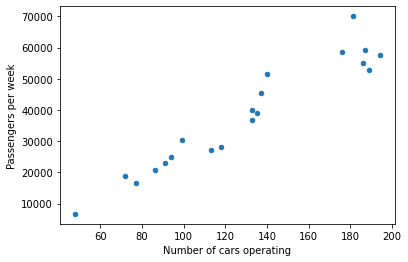

In [3]:
electtrain.plot.scatter(
    x="Number of cars operating",
    y="Passengers per week"
)

Wykres ten jest przykładem "positive association": ponieważ kiedy „Liczba ekspolatowanych samochodów” wzrasta, liczba „Pasażerów na tydzień” również wzrasta.

Ten wykres przedstawia *korelację liniową*. Oznacza to, że "positive association" można dokładnie modelować za pomocą linii prostej (*tj.* najlepsza dopasowana linia byłaby linią prostą, a nie krzywą).

W tej lekcji opracujemy linię najlepszego dopasowania za pomocą techniki znanej jako regresja liniowa.

**Jednostki standaryzowane**

Aby obliczyć linię najlepszego dopasowania, należy na początek przekonwertować jednostki na *jednostki skali standaryzowanej*. Jednostki standaryzowane to sposób umieszczania różnych rodzajów obserwacji na tej samej skali. Chodzi o to, aby zastąpić daną liczbę odchyleniem standardowym, które jest powyżej lub poniżej średniej danych.

${\large Jednostki\space Standaryzowane =\Large z = \frac{x-\mu}{\sigma}}$

${x = \text{Każdy punkt odniesienia w populacji}}$

${\mu = \text{Średnia populacji}}$

${\sigma = \text{Odchylenie standardowe populacji}}$

Z poprzednich lekcji wiemy, jak obliczyć średnią (*poprzez* [funkcje](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) `.mean()` ) i odchylenie standardowe (*poprzez* [funkcje](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) `.std()`)


Zacznijmy od kolumny `Liczba działających samochodów` z naszego *DataFrame* `electtrain`. Najpierw zapisz średnią i odchylenie standardowe `electtrain["Number of cars operating"]` jako zmienne oznaczone odpowiednio jako `Mean` i `Std`.

In [4]:
Mean = electtrain["Number of cars operating"].mean()
Std = electtrain["Number of cars operating"].std()

Teraz obliczmy standaryzowane jednostki `electtrain["Number of cars operating"]`, używając powyższego równania, zapisując nową *DataFrame* w zmiennej oznaczonej `StandardUnits`.

In [5]:
StandardUnits = (electtrain["Number of cars operating"] - Mean)/Std
StandardUnits

0    -1.286163
1    -1.823463
2    -1.174225
3    -0.860800
4    -0.793637
5    -0.972738
6    -0.681700
7    -0.368275
8    -0.256337
9     0.079476
10    0.079476
11    0.124251
12    0.169026
13    0.236188
14    1.042139
15    1.266014
16    1.445114
17    1.333177
18    1.288402
19    1.154076
Name: Number of cars operating, dtype: float64

Obliczanie standaryzowanych jednostek zarówno „Liczby eksploatowanych samochodów”, jak i „Pasażerów na tydzień”, w ten sposób nie jest wydajne.

Jak już nauczyłeś się wcześniej, jeśli chcesz wielokrotnie uruchomić dany fragment kodu, dobrą praktyką jest przekształcenie go w funkcję zdefiniowaną przez użytkownika, a poniżej właśnie to zrobiliśmy.

In [ ]:
def standard_units(df): #df to po prostu skrót od DataFrame
    """Konwersja DataFrame do jednostek standaryzowanych"""
    return (df - df.mean())/df.std()

Użyjmy tej funkcji, aby obliczyć standardowe jednostki zarówno dla „Liczby eksploatowanych samochodów”, jak i „Pasażerów na tydzień”. Możemy obliczyć obie kolumny jednocześnie, wybierając dwie kolumny i umieszczając je na liście (jak nauczyłeś się w lekcji 1), patrz poniżej:

```Python
["Number of cars operating","Passengers per week"]
```
Następnie umieszczamy tę listę w nawiasach kwadratowych naszego *DataFrame* `electrain`.
```Python
electtrain[["Number of cars operating","Passengers per week"]]
```

Poniżej używamy `.head()` do wyświetlenia tylko pierwszych 5 wierszy, aby spojrzeć jak dane wyglądają dotychczas.

In [7]:
electtrain[["Number of cars operating","Passengers per week"]].head()

Number of cars operating  Passengers per week
0                        72                18764
1                        48                 6688
2                        77                16504
3                        91                22944
4                        94                25063

Teraz umieśćmy te wybrane dane w naszej funkcji `standard_units` jako pierwszy i jedyny argument, zapisując dane wyjściowe w nowej zmiennej *DataFrame* o nazwie `electtrain_su`.

In [8]:
electtrain_su = standard_units(
    electtrain[["Number of cars operating","Passengers per week"]]
)

electtrain_su.head()

Number of cars operating  Passengers per week
0                 -1.286163            -1.107247
1                 -1.823463            -1.797425
2                 -1.174225            -1.236412
3                 -0.860800            -0.868347
4                 -0.793637            -0.747240

**Zadanie 1:** *Za pomocą funkcji `standard_units()` znajdź standardowe jednostki w kolumnie `Miles per week` w DataFrame `electtrain`.*

In [9]:
#odpowiedź
standard_units(electtrain["Miles per week"])

0    -1.494572
1    -1.833143
2    -1.501243
3    -1.159337
4    -0.919168
5    -0.855791
6    -0.473856
7    -0.067619
8    -0.131950
9     0.282150
10    0.399852
11    0.474190
12    0.572830
13    0.459179
14    0.633349
15    0.767967
16    0.925459
17    1.250687
18    1.368626
19    1.302390
Name: Miles per week, dtype: float64

**Korelacja**

W tej sekcji obliczymy *Współczynnik korelacji Pearsona produkt-moment*, (ang.  Pearson Product-moment correlation coefficient) znany również jako *współczynnik korelacji* lub po prostu jako *korelacja*, jak odtąd będziemy go nazywać.

Korelacja jest zwykle oznaczana literą „r”. Taka statystyka dostarcza miarę siły zależności liniowej między dwiema zmiennymi.

`r` ma następujące właściwości:

- Wartość `r` jest zawsze od -1 do +1;
- Wielkość korelacji „r” wskazuje siłę zależności liniowej. Na przykład wartości bliskie +1 lub -1 wskazują na silniejszą zależność liniową niż dla wartości bliższych 0;
- Jeśli `r=0`, to nie ma absolutnie żadnej korelacji liniowej;
- Jeśli `r=1`, to istnieje doskonała dodatnia korelacja liniowa. Podobnie, `r=-1`, to istnieje doskonała ujemna korelacja liniowa.

Aby obliczyć `r` musimy wykonać następujące czynności:

1. Przekształć dwie kolumny w standaryzowane jednostki (co już zrobiliśmy). Te dwie kolumny to `electtrain_su["Number of cars operating"]` oraz `electtrain_su["Passengers per week"]`
2. Oblicz iloczyn dwóch kolumn. Aby obliczyć iloczyn, należy pomnożyć obie kolumny, używając operatora `*` oraz zapisując wynik jako zmienną o nazwie `Product`. Jest to pokazane poniżej.
```Python
Product = electtrain_su["Number of cars operating"] * electtrain_su["Passengers per week"]
```
3. Na koniec znajdujemy średnią iloczynu dwóch znormalizowanych kolumn. To jest korelacja. Średnią znajdujemy za pomocą `.mean()`.
```Python
Product.mean()
```
W poniższych komórkach przechodzimy przez ten proces.

In [10]:
Product = electtrain_su["Number of cars operating"] * electtrain_su["Passengers per week"]
Product

0     1.424099
1     3.277539
2     1.451826
3     0.747473
4     0.593038
5     0.958477
6     0.303133
7     0.232820
8     0.144708
9    -0.006606
10    0.008869
11    0.006410
12    0.069676
13    0.182378
14    1.218660
15    1.231911
16    1.600775
17    1.118740
18    1.552363
19    2.105908
dtype: float64

Teraz wystarczy znaleźć średnią wszystkich tych wartości, aby znaleźć `r`. Aby znaleźć średnią, używamy funkcji `.mean()`.

In [11]:
train_r = Product.mean()
train_r

0.9111099048383633

Jeszcze raz napiszmy ten mały proces umieszczając go w naszej własnej funkcji zdefiniowanej przez użytkownika. Wewnątrz funkcji definiowanych przez użytkownika, można umieszać inne zdefiniowane już wcześniej funkcje. Dlatego w nowej funkcji, którą zamierzamy napisać, wykorzystamy funkcję `standard_units()` zdefiniowaną wcześniej, abyśmy byli w stanie obliczyć korelację od podstaw. Dlaczego chcemy to zrobić? Dlatego, że pozwoli nam to za każdym razem obliczyć korelację dla innej kolumny naszego *DataFrame*, wciąż korzystając z tej samej funkcji.


Argumenty pozycyjne funkcji `correlation()`, będą następujące:

1. Pierwszym argumentem będzie zmienna *DataFrame* zawierająca nasze dane. Będzie to zmienna `df` w poniższej funkcji.
2. Drugim argumentem będzie etykieta kolumny osi X, która jest łańcuchem znaków. Będzie to zmienna `x`.
3. Trzecim argumentem będzie etykieta kolumny osi Y, która jest łańcuchem. Będzie to zmienna `y`.

Dlatego dwie wprowadzone kolumny są opisane przez `df[x]` i `df[y]`.

In [12]:
def correlation(df,x,y):
    """Ta funkcja oblicza korelację Pearsona."""
    df_product = standard_units(df[x]) * standard_units(df[y]) #Ta linia oblicza iloczyn dwóch kolumn
    return df_product.mean() #Zwróć średnią mnożenia dwóch kolumn

Funkcja działa w następujący sposób:

1. Zdefiniowaliśmy funkcję w pierwszej linii.
```Python
def correlation(df,x,y):
```
2. Druga linia opisuje, co robi funkcja.
```Python
"""Ta funkcja oblicza korelację Pearsona."""
```
3. Trzecia linia oblicza iloczyn dwóch standaryzowanych kolumn.
```Python
df_product = standard_units(df[x]) * standard_units(df[y])
```
    Gdzie `df_product` to zmienna przechowująca iloczyn dwóch kolumn. `standard_units(df[x])` i `standard_units(df[y])` to kolumny, które zostały przekonwertowane na jednostki standaryzowane.
    
    
4. Ostatnia linia wyświetla średnią `df_product` *DataFrame* - która jest naszą korelacją.
```Python
return df_product.mean()
```

Aby uruchomić tę funkcję, wystarczy wywołać jej nazwę `correlation()` po wprowadzeniu parametrów. Aby znaleźć korelację między kolumnami `Number of cars operating` i `Passengers per week` w *DataFrame* `electtrain`, potrzebujemy następujących argumentów:

- Pierwszym argumentem jest `electtrain`, ponieważ jest to *DataFrames*, który zawiera kolumny, których korelację chcemy znaleźć.
- Drugi argument to `"Number of cars operating"`, ponieważ jest to etykieta jednej z kolumn.
- Trzecim argumentem jest `"Passenger per week"`, ponieważ jest to etykieta drugiej kolumny.

In [13]:
correlation(electtrain,"Number of cars operating","Passengers per week")

0.9111099048383633

**Ćwiczenie 2:** *Używając funkcji `correlation()` znajdź korelację między `Miles per week` i `Number of cars operating` z DataFrame `electtrain`?*

In [14]:
#Odpowiedź
correlation(electtrain,"Miles per week","Number of cars operating")

0.9095627390830714

**Linia regresji**

Współczynnik korelacji „r” nie tylko mierzy, w jaki sposób skupione są punkty na wykresie punktowym wokół linii prostej. Pomaga również zidentyfikować linię prostą, wokół której zgrupowane są te punkty.

Za pomocą kilku równań możemy wyznaczyć linię najlepszego dopasowania do naszych punktów danych. Ta linia pozwoli nam przewidzieć przyszłe wyniki.

Linia prosta jest opisana przez

${\large y=mx+c}$

${\text{y to wartości na osi y}}$

${ \text{m to gradient lub nachylenie prostej}}$

${ \text{x to wartości na osi x}}$

${ \text{c to punkt przecięcia prostej z osią y}}$

W naszym przypadku chcemy opracować równanie, aby na podstawie znanej wartości `Passengers per week` można było przewidzieć `Number of cars operating`:

${\text{"Passengers per week" = m * "Number of cars operating" + c }}$

Dlatego musimy obliczyć ${m}$, nachylenie i ${c}$, punkt przecięcia.

1. **Nachylenie** (${m}$)

Równanie do obliczenia nachylenia/nachylenia tej linii najlepszego dopasowania znajduje się poniżej:

${\large Nachylenie=m=r*\frac{\text{Odchylenie standardowe Y}}{\text{Odchylenie standardowe X}}=\frac{r \sigma_{y}}{\sigma_{x}} }$

Obliczyliśmy już korelację `r` i możemy znaleźć odchylenie standardowe *DataFrame* za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) `.std()` - używanej wcześniej.

Dlatego poniżej obliczamy nachylenie linii regresji najlepszego dopasowania.

In [15]:
# train_r jest naszą wartością r policzoną wcześniej
y_std = electtrain["Passengers per week"].std()
x_std = electtrain["Number of cars operating"].std()

Gradient = (train_r*y_std)/x_std
Gradient

356.8931196986464

Napiszmy też funkcję, która zautomatyzuje ten proces.

In [16]:
def slope(df,x,y):
    """Ta funkcja oblicza nachylenie linii regresji najlepszego dopasowania"""
    r = correlation(df,x,y)
    std_ratio = df[y].std()/df[x].std()
    return r * std_ratio

I wywołajmy tę funkcję.

In [17]:
slope(electtrain,"Number of cars operating","Passengers per week")

356.8931196986464

**Ćwiczenie 3:** *Używając funkcji `slope()` znajdź nachylenie linii regresji utworzonej z kolumn `Miles per week` i `Number of cars operating` z danych `electtrain` DataFrame?*

In [18]:
#Odpowiedź
slope(electtrain,"Miles per week","Passengers per week")

3.730116496447275

2. **Przecięcie** (${c}$)

Poniżej znajduje się równanie do obliczenia punktu przecięcia tej linii najlepszego dopasowania:

${\large Przecięcie=\text{Średnia Y}-nachylenie \cdot \text{Średnia X}=\mu_{y}-m\mu_{x}}$

Powyżej obliczyliśmy nachylenie. Potrafimy też użyć [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) `.mean()` do obliczenia średniej. W związku z tym, mamy wszystkie składniki do obliczenia punktu przecięcia i poniżej to właśnie zrobimy.

In [19]:
#Gradient to nasza zmienna, w której zapisana jest wartość nachylenia.
y_mean = electtrain["Passengers per week"].mean()
x_mean = electtrain["Number of cars operating"].mean()

y_mean - Gradient*x_mean

-8062.414344989767

Napiszmy funkcję, która zautomatyzuje ten proces.

In [20]:
def intercept(df,x,y):
    """Ta funkcja oblicza punkt przecięcia linii regresji"""
    mean_y = df[y].mean()
    mean_x = df[x].mean()
    gradient = slope(df,x,y)
    return mean_y - gradient*mean_x

I wywołajmy ją.

In [21]:
intercept(electtrain,"Number of cars operating","Passengers per week")

-8062.414344989767

**Ćwiczenie 4:** *Używając funkcji `intercept()` znajdź punkt przecięcia linii regresji utworzonej z kolumn `Miles per week` i `Number of cars operating` z danych `electtrain` DataFrame?*

In [22]:
#Answer
intercept(electtrain,"Miles per week","Passengers per week")

4921.458622436308

**Przewidywanie**

Jak widzieliśmy wcześniej, równanie prostej, którą chcemy wykreślić, wygląda następująco:

${\text{Passengers per week} = Gradient \cdot \text{Number of cars operating} + Intercept }$

Stworzyliśmy funkcje, które mogą obliczyć nachylenie i przecięcie, co oznacza, że mamy teraz wszystkie składniki równania linii prostej. Dlatego możemy użyć powyższego równania do przewidzenia `Passengers per week`, jeśli znamy wartość `Number of cars operating`.

Poniżej zapisaliśmy nachylenie jako zmienną o nazwie `reg_slope` a punkt przecięcia jako `reg_intercept`.

In [23]:
reg_slope = slope(electtrain,"Number of cars operating","Passengers per week")
reg_intercept = intercept(electtrain,"Number of cars operating","Passengers per week")

Jeśli mamy 100 samochodów działających na linii kolejowej (`Number of cars operating = 100`), możemy znaleźć prognozę `Passenger per week` z równaniem naszej linii powyżej.

Poniżej użyliśmy tego równania, aby znaleźć prognozę.

In [24]:
Number_cars = 100
Number_cars*reg_slope+reg_intercept

27626.897624874873

**Automatyzacja przewidywania**

Zamiast wprowadzać za każdym razem poszczególne liczby do kodu programu, ciekawym sposobem rozwiązania tego problemu może być przygotowanie programu, który poprosi nas o wprowadzenie danych wejściowych do okienka, czyli ilości wagonów.

Aby pobrać dane od użytkownika, musimy użyć [funkcji](https://docs.python.org/3/library/functions.html#input) `input()` .

W poniższym kodzie pierwsza linia `x = input()` uruchamia funkcję, która otwiera monit dla użytkownika o wprowadzenie danych wejściowych. Użytkownik może wpisać do tego pola wszystko, o czym warto pamiętać.

In [3]:
x = input()
x

1


'1'

Dane wejściowe są zawsze przechowywane jako ciąg. [funkcja](https://docs.python.org/3/library/functions.html#type) `type()` wypisze nam typ zmiennej, którą umieściłeś w argumencie funkcji.

In [4]:
type(x)

str

Możemy umieścić łańcuch w argumencie funkcji `input()`, aby działał jako znak zachęty.

In [6]:
name = input("Wprowadź swoje imie: ")
print("Cześć, nazywasz się:",name)

Wprowadź swoje imie: Karol
Cześć, nazywasz się: Karol


Wynikiem jest `str`, który jest *ciągiem* lub *łańcuchem*. Łańcuch to inaczej ciąg znaków.

Nie możemy użyć do obliczeń łańcucha, nawet jeśli zawiera on liczbę. Dlatego musimy użyć innej [funkcji](https://docs.python.org/3/library/functions.html#int) `int()`, aby przekonwertować tę zmienną ciągu na zmienną całkowitą. Liczba całkowita to liczba, którą możemy już wykorzystać do obliczeń.

In [8]:
number = input("Podaj liczbę: ")
print(number,"* 10 =",int(number)*10)

Podaj liczbę: 2
2 * 10 = 20


Jeśli nie użyjemy funkcji `int()` w powyższym przykładzie, `liczba` jest traktowana jako łańcuch. Oznacza to, że „liczba” jest drukowana dziesięć razy. Zobacz poniżej:

In [9]:
number = input("Podaj liczbę: ")
print(number,"*10 =",number*10)

Podaj liczbę: f
f *10 = ffffffffff


Dlatego możemy wykorzystać tę funkcję do zautomatyzowania prognozy, pytając użytkownika o liczbę wagonów na kolei.

In [10]:
Number_cars = int(input("Podaj liczbę wagonów na torach: "))
Number_cars*reg_slope+reg_intercept

Podaj liczbę wagonów na torach: 23


NameError: name 'reg_slope' is not defined

Aby wynik wyglądał lepiej, dobrze jest go zaokrląglić za pomocą `round()` i otoczyć instrukcją `print()`, która zwróci wartość funkcji w formie tekstu.

In [11]:
Number_cars = int(input("Podaj liczbę wagonów na torach: "))
print("Przewiduje się, że będzie wtedy: " ,round(Number_cars*reg_slope+reg_intercept), " pasażerów na tydzień")

Podaj liczbę wagonów na torach: 23


NameError: name 'reg_slope' is not defined

Zapiszmy to jako funkcję.

In [ ]:
def predict(df,x,y):
    c = intercept(df,x,y)
    m = slope(df,x,y)
    input_string = "Wejście " + x + ": "
    input_x = int(input(input_string))
    return round(input_x*m+c)

In [ ]:
predict(electtrain,"Number of cars operating","Passengers per week")

**Ćwiczenie 5:** *Używając funkcji `predict()` znajdź przewidywaną liczbę mil tygodniowo, gdy wykorzystywanych jest 100 samochodów.*

In [ ]:
#Odpowiedź
predict(electtrain,"Number of cars operating","Miles per week")
#Odpowiedź powinna brzmieć: 6388 miles

**Zapętlenie naszej prognozy**

Możemy wielokrotnie zapętlać naszą funkcję `predict()`, aby umożliwić użytkownikowi przewidywanie na podstawie wielu różnych fragmentów danych.

Aby stworzyć tę pętlę, użyjemy funkcji [pętli](https://wiki.python.org/moin/ForLoop) `for` . Pętla `for` jest na przykład używana do powtórzenia zestawu kodu określoną liczbę razy.

Zamierzamy również użyć [funkcji](https://docs.python.org/3/library/functions.html#func-range) `range()` jako sposobu na zdefiniowanie liczby iteracji, którą ta pętla ma wykonać.

Aby napisać pętlę `for` wykonaj następujące czynności:

1. Zacznij od `for`
```Python
for
```
2. Następnie zdefiniuj iteracyjną etykietę zmiennej, tzw iterator. Ta zmienna jest liczbą całkowitą, która zwiększa się o 1 za każdym razem, gdy kończy się pojedyncza pętla kodu. W tym przypadku nazwij ją `x`.
```Python
for x
```
3. Następnie należy określić, ile iteracji zajmie pętla for. Odbywa się to poprzez dodanie `in range(6)`. Możesz zmienić liczbę w funkcji `range()`, aby zmienić liczbę wykonanych pętli. Pamiętaj, że Python zaczyna liczyć od zera, więc pierwsza liczba, jaką przyjmuje `x`, to zero.
```Python
for x in range(6)
```
4. Teraz musisz umieścić dwukropek `:` na końcu. Cały kod, który chcesz uruchomić w pętli `for` musi mieć wcięcie — tak jak w przypadku instrukcji `if`, której używaliśmy wcześniej.
```Python
for x in range(6):
```
5. Teraz wywołaj fragment kodu `print(x)`. Za każdym razem pętla for iteruje, czyli zwiększa sie o 1. Zauważ, że za każdym razem, gdy pętla `for` wykonuje iterację, wartość x wzrośnie o jeden, zaczynając od zera. Dlatego wynikiem będą liczby od zera do pięciu.
```Python
for x in range(6):
        print(x)
```

Uruchom komórkę poniżej, aby zobaczyć dane wyjściowe tego kodu.

In [ ]:
for x in range(6):
    print(x)

Możesz zmienić liczbę pętli, edytując argument funkcji `range()`.

In [ ]:
for x in range(3):
    print(x)

**Ćwiczenie 6:** *Za pomocą pętli `for` uruchom kod `print("Witaj świecie!")` 5 razy.*

In [12]:
#Odpowiedź
for x in range(5):
    print("Witaj świecie!")

Witaj świecie!
Witaj świecie!
Witaj świecie!
Witaj świecie!
Witaj świecie!


Możesz również zmienić nazwę zmiennej, którą iterujesz.

In [ ]:
for iterate_number in range(4):
    print(iterate_number)

W pętli `for` można umieścić dowolny kod.

In [13]:
for iterate_number in range(2):
    print("Każdy kod, który jest wcięty po pętli for, zostanie uruchomiony")
    print(iterate_number)

Każdy kod, który jest wcięty po pętli for, zostanie uruchomiony
0
Każdy kod, który jest wcięty po pętli for, zostanie uruchomiony
1


**Ćwiczenie 7:** *Używając pętli „for” ze zmienną „x” wypisz pierwszych 8 liczb podniesionych do kwadratu. Aby wydrukować kwadratowe liczby, musisz wykonać `print(x ** 2)`.*

In [14]:
#Odpowiedź
for x in range(8):
    print(x ** 2)

0
1
4
9
16
25
36
49


Możesz również użyć funkcji `input()`, jak widziałeś/aś wcześniej, aby zdefiniować liczbę iteracji wykonywanych przez pętlę `for`.

In [ ]:
number_of_iterations = int(input("Ile iteracji chcesz wykonać?: "))
for y in range(number_of_iterations):
    print(y)

Umieść funkcję `print()` w pętli `for`, aby powtórzyć przewidywanie wiele razy.

In [ ]:
number_of_iterations = int(input("Ile iteracji chcesz wykonać?: "))
for y in range(number_of_iterations):
    print("Odpowiedź to: ",predict(electtrain,"Number of cars operating"," Pasażerów na tydzień."))

**Wnioski:**

*Powinieneś być teraz w stanie wykonać następujące czynności:*

1. Obliczyć standaryzowane jednostki kolumn w *DataFrame*.
2. Rozumieć, czym jest korelacja i co ona oznacza.
3. Obliczyć korelację.
4. Użyć równania matematycznego, aby obliczyć nachylenie i przecięcie linii regresji.
5. Wiedzieć, jak używać funkcji `input()` do rysowania danych wejściowych użytkownika.
6. Wiedzieć, jak używać pętli `for`.

**Sources:**

[1] Sprague, F.J. (1888). "The Solution of Municipal Rapid Transit"
Journal of American Inst. of Elec. Engineers.  Vol. 5. pp. 352-399